Гопиенко Александр КИ22-17/2Б 
Практическая работа по глубокому обучению №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Bidirectional
from keras.metrics import RootMeanSquaredError

Обработка данных

In [2]:
df = pd.read_csv("Electric_Production.csv")
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DATE        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
IPG2211A2N,397.0,88.847218,15.387834,55.3151,77.1052,89.7795,100.5244,129.4048


Нормализация временного ряда

In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

numerical_columns = df.select_dtypes(include=['float']).columns

minmax_scaler = MinMaxScaler()
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

Визуализация временного ряда

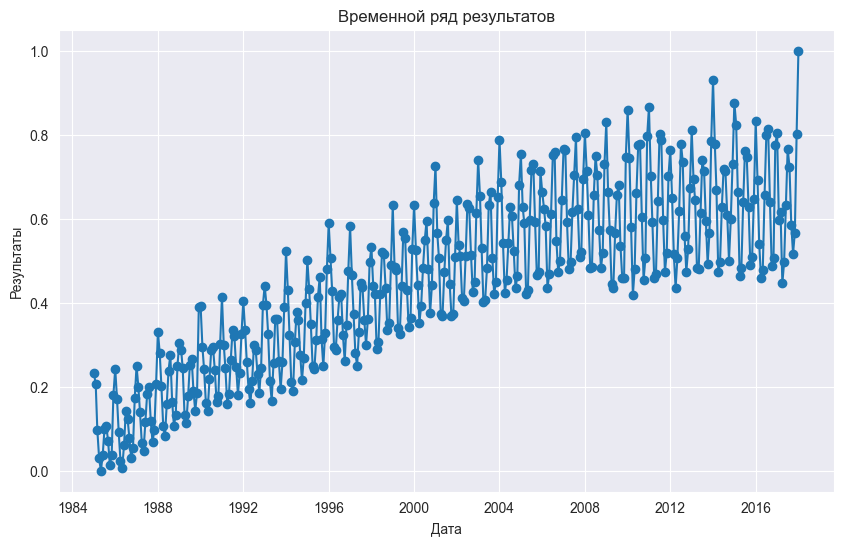

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(df['DATE'], df['IPG2211A2N'], marker='o', linestyle='-')
plt.title('Временной ряд результатов')
plt.xlabel('Дата')
plt.ylabel('Результаты')
plt.grid(True)
plt.show()

Создание реккурентной нейронной сети

In [7]:
df['DATE'] = df['DATE'].apply(lambda x: x.toordinal())
X_train, X_test, y_train, y_test = train_test_split(df['DATE'], df['IPG2211A2N'], test_size=0.3)

X_train = X_train.to_numpy()[:, np.newaxis]
X_test = X_test.to_numpy()[:, np.newaxis]

model = Sequential()
model.add(SimpleRNN(64, activation='linear', input_shape=(None, 1)))
model.add(Dense(128, activation='linear'))
model.add(Dense(1, activation='tanh'))

model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), validation_split=0.1)
model.summary()

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)


Epoch 1/10
9/9 [==============================] - 3s 133ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 2/10
9/9 [==============================] - 0s 14ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 3/10
9/9 [==============================] - 0s 8ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 4/10
9/9 [==============================] - 0s 8ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 5/10
9/9 [==============================] - 0s 8ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 6/10
9/9 [==============================] - 0s 8ms/step - loss: 2.1086 - root_mean_squared_error: 1.4521 - val_loss: 2.2556 - val_root_mean_squared_er

RNN модель с LSTM

In [8]:
lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='linear', input_shape=(None, 1)))
lstm_model.add(Dense(128, activation='linear'))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1, activation='tanh'))

lstm_model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = lstm_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Epoch 1/100
9/9 [==============================] - 3s 57ms/step - loss: 0.3601 - root_mean_squared_error: 0.6001 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 2/100
9/9 [==============================] - 0s 39ms/step - loss: 0.3858 - root_mean_squared_error: 0.6212 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 3/100
9/9 [==============================] - 0s 18ms/step - loss: 0.4197 - root_mean_squared_error: 0.6479 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 4/100
9/9 [==============================] - 0s 21ms/step - loss: 0.3824 - root_mean_squared_error: 0.6184 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 5/100
9/9 [==============================] - 0s 18ms/step - loss: 0.3683 - root_mean_squared_error: 0.6069 - val_loss: 0.3024 - val_root_mean_squared_error: 0.5499
Epoch 6/100
9/9 [==============================] - 0s 15ms/step - loss: 0.3849 - root_mean_squared_error: 0.6204 - val_loss: 0.3024 - val_root_mean_sq

RNN модель с GRU

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

gru_model = Sequential()
gru_model.add(Bidirectional(GRU(64, activation='linear', input_shape=(None, 1))))
gru_model.add(Dense(128, activation='linear'))
gru_model.add(Dropout(0.1))
gru_model.add(Dense(128, activation='linear'))
gru_model.add(Dropout(0.1))
gru_model.add(Dense(1, activation='tanh'))

gru_model.compile(optimizer='adam', loss='mse', metrics=[RootMeanSquaredError()])
gru_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

y_pred = gru_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

Epoch 1/100
9/9 [==============================] - 4s 69ms/step - loss: 1.6075 - root_mean_squared_error: 1.2679 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 2/100
9/9 [==============================] - 0s 8ms/step - loss: 1.5239 - root_mean_squared_error: 1.2344 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 3/100
9/9 [==============================] - 0s 8ms/step - loss: 1.4876 - root_mean_squared_error: 1.2197 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 1.5530 - root_mean_squared_error: 1.2462 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 1.5609 - root_mean_squared_error: 1.2494 - val_loss: 2.2556 - val_root_mean_squared_error: 1.5019
Epoch 6/100
9/9 [==============================] - 0s 7ms/step - loss: 1.5981 - root_mean_squared_error: 1.2641 - val_loss: 2.2556 - val_root_mean_squared

Вывод: Получены навыки работы с реккурентными нейронными сетями